In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

!pip install -r requirements.txt
!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="KBKyjBeG98FKXoIIJ5Zn")
project = rf.workspace("marioworkspacetest").project("swe_hw4-ni49x")
version = project.version(2)
dataset = version.download("yolov5")






Cloning into 'yolov5'...
remote: Enumerating objects: 17739, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 17739 (delta 63), reused 36 (delta 36), pack-reused 17634 (from 3)
Receiving objects: 100% (17739/17739), 17.16 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (12048/12048), done.
/content/yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SWE_HW4-2 in yolov5pytorch:: 100%|██████████| 176/176 [00:00<00:00, 6305.77it/s]


In [2]:
!python train.py --img 512 \
                 --batch 8 \
                 --epochs 20 \
                 --data /content/yolov5/SWE_HW4-2/data.yaml \
                 --weights yolov5s.pt \
                 --name redpanda_yolov5s

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-11-23 00:19:04.056587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763857144.133027   75849 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763857144.150783   75849 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763857144.216701   75849 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763857144.216821   75849 computation_placer.cc:177] computation placer already registere

In [3]:
!python detect.py \
  --weights runs/train/redpanda_yolov5s/weights/best.pt \
  --img 512 \
  --source /content/yolov5/SWE_HW4-2/test/images \
  --data /content/yolov5/SWE_HW4-2/data.yaml

detect: weights=['runs/train/redpanda_yolov5s/weights/best.pt'], source=/content/yolov5/SWE_HW4-2/test/images, data=/content/yolov5/SWE_HW4-2/data.yaml, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-448-gdeec5e45 Python-3.12.12 torch-2.9.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/9 /content/yolov5/SWE_HW4-2/test/images/Screenshot-2025-11-22-173049_png.rf.8dd04c09a553e19cd0441e536f75a2ea.jpg: 512x512 1 Red Panda, 342.3ms
image 2/9 /content/yolov5/SWE_HW4-2/test/images/Screenshot-2025-11-22-173102_png.rf.cf28e9618fa834b9929e0b8400f6a533.jpg: 512x512 1 Red Pa

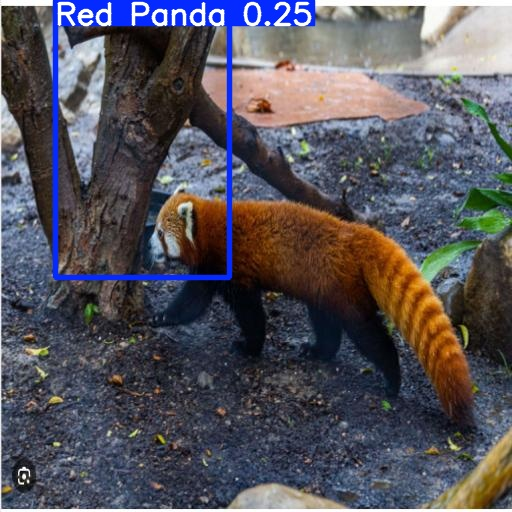

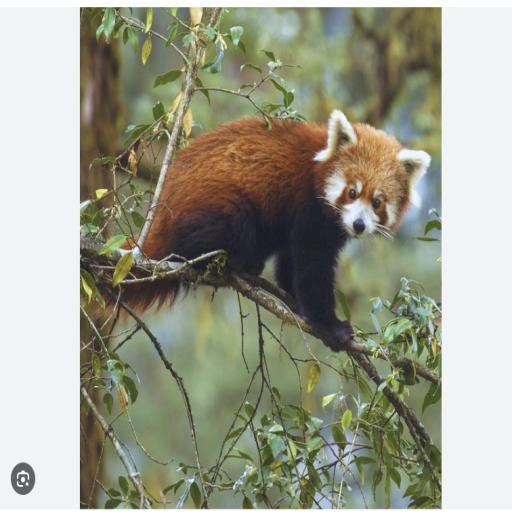

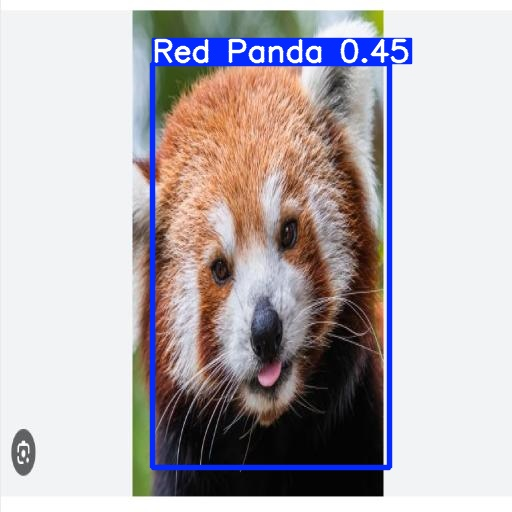

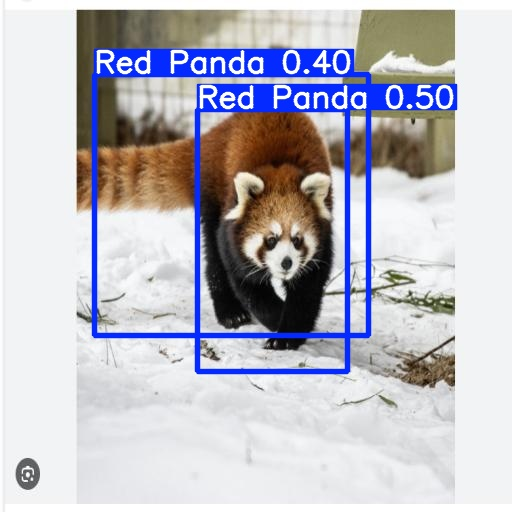

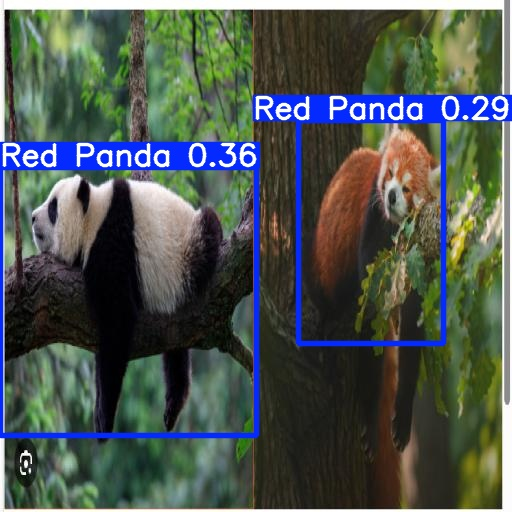

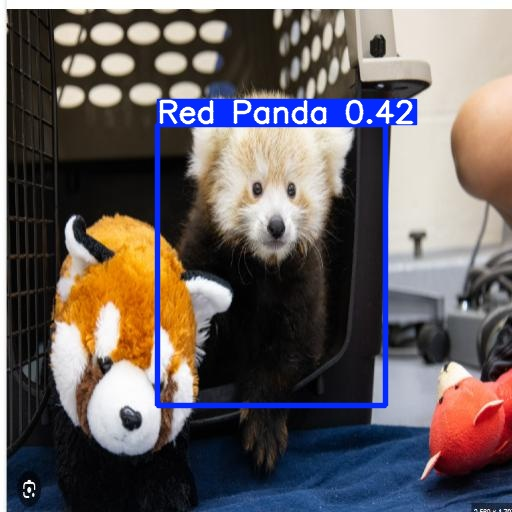

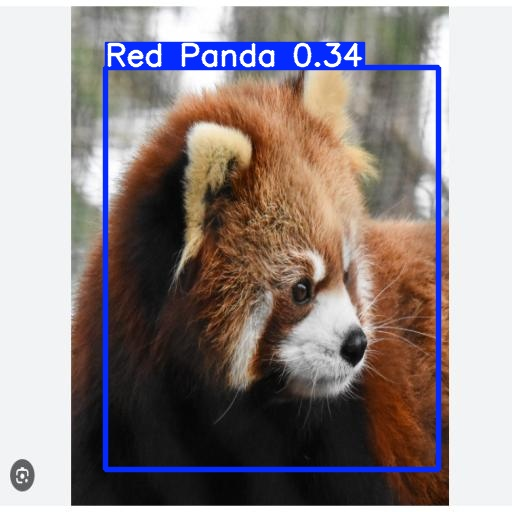

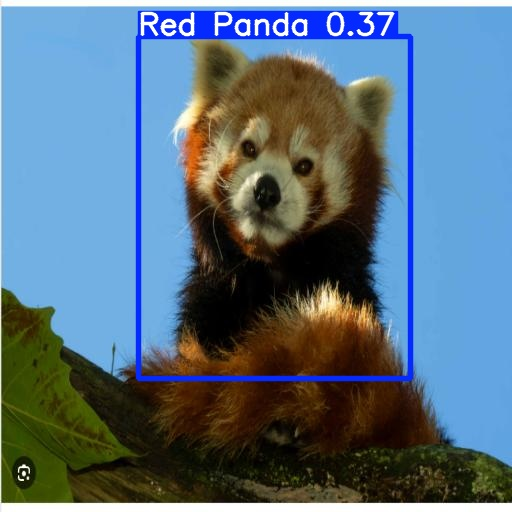

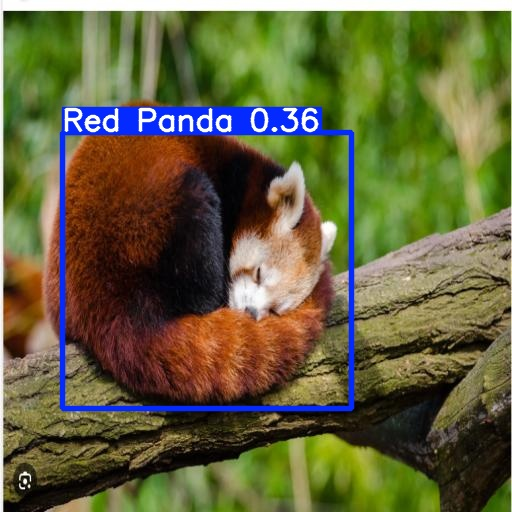

In [4]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/exp/*.jpg'):
    display(Image(filename=image_path))
